In [47]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


이번 실습에서는 선형회귀를 텐서플로우를 사용해보겠습니다.
선형회귀 실습에 사용할 데이터를 만들어보겠습니다.
데이터는 아래와 같이 정규분포를 사용해서 랜덤하게 만들었습니다.

In [48]:
num_points = 300

In [49]:
vectors_set = []

for i in range(num_points):
    x1 = np.random.normal(0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0, 0.03)
    vectors_set.append([x1, y1])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]



그래프를 그려보면 x_data 와 y_data 는 선형의 관계에 있는 것을 쉽게 알 수가 있습니다.

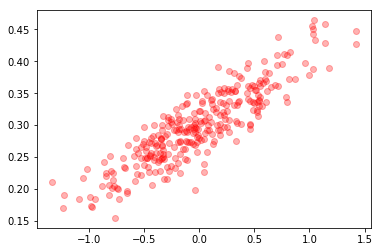

In [50]:
plt.plot(x_data, y_data, 'ro', alpha=0.3)

행렬(텐서)을 다룰 때 벡터화된 연산을 사용하면 더 알기 쉽고 사용하기도 편합니다.
벡터화된 연산을 사용해서 위의 데이터와 같은 조건으로 데이터를 다시 생산했습니다.

In [51]:
np.random.seed(379)
x_data = np.random.normal(0, 0.55, num_points)
y_data = x_data * 0.1 + np.random.normal(0.3, 0.03, num_points)

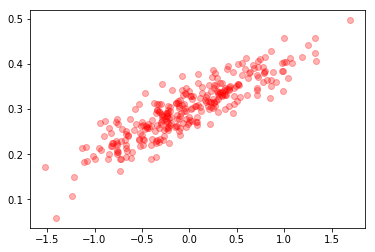

In [52]:
plt.plot(x_data, y_data, 'ro', alpha=0.3)

아래가 텐서플로우를 사용해서 선형회귀를 하는 코드입니다.


In [53]:
x_data = x_data.reshape(-1,1)
y_data = y_data.reshape(-1,1)

X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable( tf.random_normal([1]) )
b = tf.Variable( tf.random_normal([1]) )

hypothesis = X * W + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [54]:
learning_rate = 0.005

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [55]:
tf.set_random_seed(379)

sess = tf.Session()
sess.run(tf.global_variables_initializer())



사용자가 정의한 비용 함수를 Gradient descent 방법으로 최소화시킬려고 합니다.
설정한 learning rate 는 0.005
이며 수동을 학습의 반복 횟수를 정할 수 있습니다.

루프 안에서의 계산 되는 데이터를 스텝과 함꼐 저장하기 위해서 namedtuple 을 사용했습니다.

In [56]:
from collections import namedtuple

Step_info = namedtuple('Step_info' ,'step cost W b')
training_process = []   # list for storing Step_info data


for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run( [cost, W, b, optimizer],
                feed_dict={X:x_data, Y:y_data})
    if step % 100 == 0:
        print(step, cost_val, W_val, b_val)
        step_info = Step_info(step, cost_val, W_val, b_val)
        training_process.append(step_info)
    
    

0 4.2739 [ 1.18314564] [-1.62461793]
100 0.700237 [ 0.86286765] [-0.38829926]
200 0.162529 [ 0.64671946] [ 0.05994282]
300 0.0587546 [ 0.49542904] [ 0.22105497]
400 0.0279095 [ 0.38739362] [ 0.27793109]
500 0.0147527 [ 0.30943018] [ 0.29724318]
600 0.00818565 [ 0.25286335] [ 0.30322143]
700 0.00474844 [ 0.21170808] [ 0.30461711]
800 0.00292668 [ 0.18172412] [ 0.30455074]
900 0.00195803 [ 0.15986384] [ 0.30410573]
1000 0.00144258 [ 0.14392075] [ 0.3036361]
1100 0.00116824 [ 0.13229105] [ 0.30324042]
1200 0.00102221 [ 0.12380706] [ 0.30293241]
1300 0.000944484 [ 0.11761767] [ 0.30270049]
1400 0.000903112 [ 0.11310213] [ 0.30252883]
1500 0.000881091 [ 0.10980774] [ 0.30240259]
1600 0.000869369 [ 0.10740428] [ 0.30231011]
1700 0.00086313 [ 0.10565079] [ 0.30224258]
1800 0.000859809 [ 0.10437143] [ 0.30219325]
1900 0.000858042 [ 0.10343809] [ 0.30215725]
2000 0.000857101 [ 0.10275708] [ 0.30213088]


최종적으로 나온 W 와 b 의 결과는 아래와 같습니다.

학습에 사용한 데이터에서 W 는 기울기 b 는 y절편에 해당하는데,  기울기는 0.1, y 절편은 0.3 를 중심으로 데이터를 분산시켰다는 사실을 재확인 할 수 있습니다.

기존 산포도 그래프와 겹쳐서  신형회귀 직선을 그려보았습니다.

In [57]:
print(sess.run(W), sess.run(b))

[ 0.10275708] [ 0.30213088]


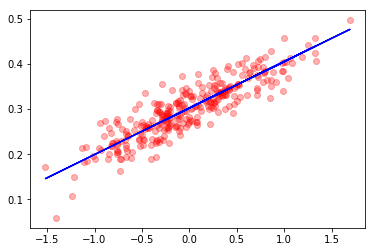

In [58]:
plt.plot(x_data, y_data, 'ro', alpha=0.3)
plt.plot(x_data, sess.run(W) * x_data + sess.run(b), 'b-')

###  훈련 스텝에 따라서 변하는 회귀 직선



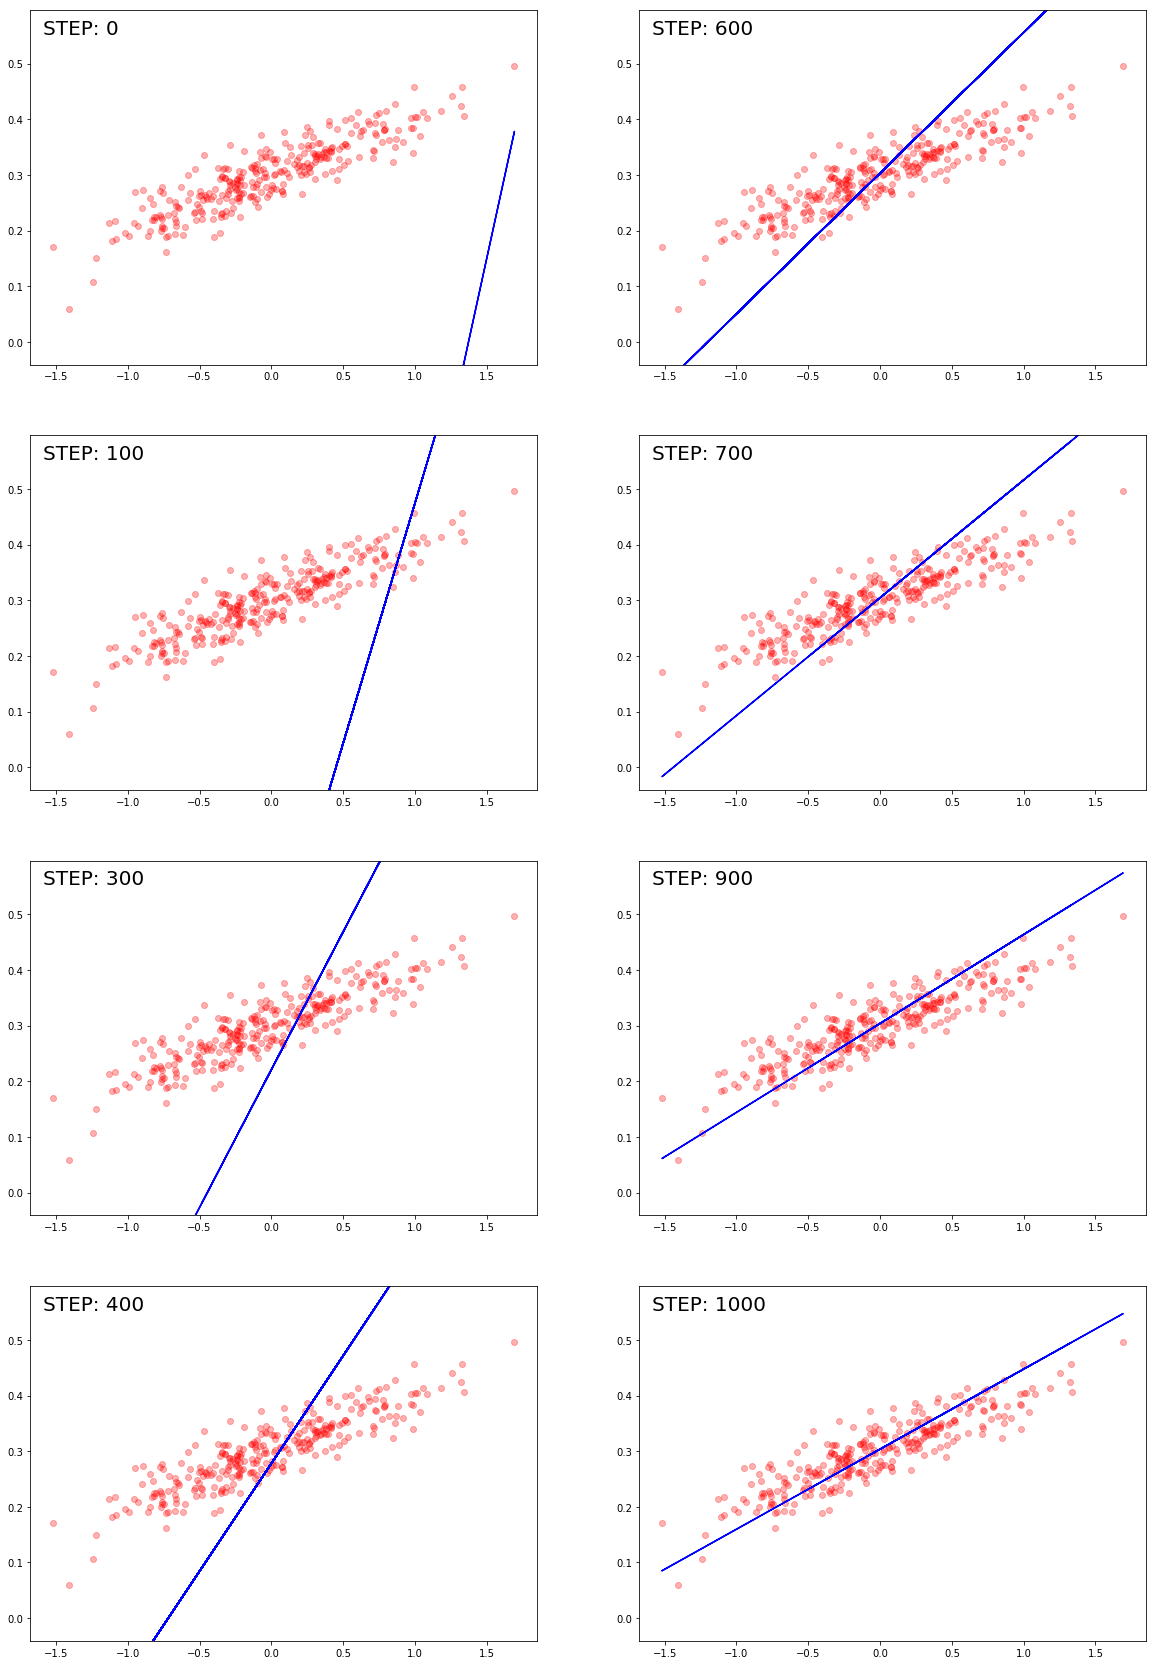

In [59]:
nrows=4; ncols=2;
fig, axes = plt.subplots(figsize=(20,30), nrows=nrows, ncols=ncols)

index = np.linspace(0,len(training_process)/2, nrows * ncols, endpoint=True)
index = np.floor(index).astype(int)


counter = 0
for c in range(ncols):
    for r in range(nrows):
        step, cost,w, b = training_process[index[counter]]
        counter += 1
        ax = axes[r,c]
        ax.plot(x_data, y_data, 'ro', alpha=0.3)
        ax.plot(x_data, w * x_data + b, 'b-')
        ax.annotate(('STEP: %s'% step),
            xy=(.025, .975), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
        ax.set_ylim(np.min(y_data) - 0.1, np.max(y_data) + 0.1)
        